Many-Body Chern Number without Integration

Koji Kudo, Haruki Watanabe, Toshikaze Kariyado, and Yasuhiro Hatsugai

Phys. Rev. Lett. 122, 146601 – Published 9 April 2019

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.122.146601

In [1]:
using QuantumOptics

In [2]:
using NBInclude
@nbinclude("../../../Single Particle/Lattice_Basis_Neighbors_Hops.ipynb"; regex=r"#.*executeme")

get_Hofstadter_hamiltonian (generic function with 1 method)

In [3]:
@nbinclude("../../../Many-Body/First Band Approximation Functions.ipynb")

exp_list1 (generic function with 1 method)

In [4]:
param_dict=Dict{}()

LL = [3, 3]
N = LL[1]*LL[2]
vv_lattice = [ [1., 0], [0, 1.] ]
b1=[0, 0]
vv_basis = [b1]

param_dict["LL"] = LL
param_dict["vv_lattice"] = vv_lattice
param_dict["vv_basis"] = vv_basis


nb = 1
t=-1
p=1
q=3
ϕ=p/q
param_dict["t"]=t
param_dict["ϕ"]=ϕ
θθ = [0, 0]
param_dict["θθ"]=θθ

coordinates, sites, site_coord, site_number = get_sites(LL, vv_lattice, vv_basis);
param_dict["coordinates"] = coordinates
param_dict["sites"] = sites
param_dict["site_coord"] = site_coord
param_dict["site_number"] = site_number;

pbc=true
param_dict["pbc"] = pbc;
neighbors = [ [1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, -1, 1]  ];
neighbors_list = [ neighbors ];
param_dict["neighbors_list"] = neighbors_list;

N1 = 10
N2 = 10
dx=2*pi/N1
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy));

param_dict["Tx"] = Tx;
param_dict["Ty"] = Ty;

## Create Single-Particle Operator

In [5]:
N = LL[1]*LL[2]
basis = NLevelBasis(N) 
param_dict["basis"] = basis;

H_T = get_Hofstadter_hamiltonian(param_dict)

9×9 Matrix{ComplexF64}:
  0.0+0.0im  -1.0+0.0im  -1.0-0.0im  …   0.0+0.0im        0.0+0.0im
 -1.0-0.0im   0.0+0.0im  -1.0+0.0im     -1.0-0.0im        0.0+0.0im
 -1.0+0.0im  -1.0-0.0im   0.0+0.0im      0.0+0.0im       -1.0-0.0im
 -1.0-0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im        0.0+0.0im
  0.0+0.0im  -1.0-0.0im   0.0+0.0im     -1.0-0.0im        0.0+0.0im
  0.0+0.0im   0.0+0.0im  -1.0-0.0im  …   0.0+0.0im       -1.0-0.0im
 -1.0+0.0im   0.0+0.0im   0.0+0.0im      0.5-0.866025im   0.5+0.866025im
  0.0+0.0im  -1.0+0.0im   0.0+0.0im      0.0+0.0im        0.5-0.866025im
  0.0+0.0im   0.0+0.0im  -1.0+0.0im      0.5+0.866025im   0.0+0.0im

In [6]:
H1 = get_sp_op(basis, H_T)

Operator(dim=9x9)
  basis: NLevel(N=9)sparse([2, 3, 4, 7, 1, 3, 5, 8, 1, 2  …  8, 9, 2, 5, 7, 9, 3, 6, 7, 8], [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9], ComplexF64[-1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im  …  0.5000000000000004 + 0.8660254037844386im, 0.5000000000000004 - 0.8660254037844386im, -1.0 + 0.0im, -1.0 + 0.0im, 0.5000000000000004 - 0.8660254037844386im, 0.5000000000000004 + 0.8660254037844386im, -1.0 + 0.0im, -1.0 + 0.0im, 0.5000000000000004 + 0.8660254037844386im, 0.5000000000000004 - 0.8660254037844386im], 9, 9)

## Create Many-Basis for Non-interacting system

In [7]:
PN=2

2

In [8]:
states = bosonstates(basis, PN)
basis_mb = ManyBodyBasis(basis, states)
param_dict["basis_mb"] = basis_mb;

In [9]:
basis_mb.shape[1]

45

# Hamiltonian

In [10]:
H_mb = get_mb_op(basis_mb, H1)

Operator(dim=45x45)
  basis: ManyBody(onebodybasis=NLevel(N=9), states:45)sparse([2, 3, 4, 7, 1, 3, 5, 8, 10, 11  …  35, 38, 41, 42, 43, 45, 24, 39, 42, 44], [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 3

In [11]:
EE, UU = eigenstates(dense(H_mb));

In [12]:
EE

45-element Vector{Float64}:
 -5.464101615137779
 -5.464101615137776
 -5.464101615137773
 -5.464101615137763
 -5.464101615137753
 -5.464101615137751
 -2.000000000000006
 -2.0000000000000013
 -2.0
 -1.999999999999999
 -1.9999999999999967
 -1.999999999999994
 -1.9999999999999927
  ⋮
  2.732050807568877
  2.732050807568877
  2.7320508075688776
  2.732050807568878
  2.732050807568878
  2.7320508075688803
  3.9999999999999964
  3.999999999999998
  3.9999999999999996
  4.000000000000001
  4.000000000000002
  4.0000000000000036

# Cherns

Berry Curvature:
\begin{equation}
\mathcal{F}(\vec{\theta}) = \log \left( U_x(\vec{\theta})U_y(\vec{\theta}+\delta_x)U_x(\vec{\theta}+\delta_y)^{-1}U_y(\vec{\theta})^{-1} \right)
\end{equation}
Link variables:
\begin{equation}
U_\mu(\vec{\theta}) = \frac{
det \left( \Phi(\vec{\theta})^\dagger \Phi(\vec{\theta}+\delta_\mu) \right) 
}{
| det \left(\Phi(\vec{\theta})^\dagger \Phi(\vec{\theta}+\delta_\mu) \right) |} , \quad \delta_x = \left(\frac{2\pi}{N_{\theta}},0 \right), \delta_y = \left(0, \frac{2\pi}{N_{\theta}}\right)
\end{equation}
Chern Number:
\begin{equation}
\mathcal{C} = \frac{1}{2\pi i} \sum_{\vec{\theta}} \mathcal{F}(\vec{\theta})
\end{equation}

In [14]:
H_mb.basis_l.shape[1]

45

In [15]:
dimH = size(H_mb)[1]

45

In [16]:
@nbinclude("../../Chern_parameter_space_sum.ipynb")

calc_F12 (generic function with 1 method)

In [17]:
EEA, UUA = calc_states_hofstadter_mb(param_dict);

In [22]:
UUA[1,1,:,:]

45×45 Matrix{ComplexF64}:
  0.0165906+0.0248553im  …   -0.0121665+0.0412391im
 -0.0308444+0.0266954im      -0.0916067-0.000888795im
 -0.0872993-0.0974526im        0.108813-0.0574321im
   0.153196+0.0551679im       0.0494865+0.129243im
 -0.0765175+0.122999im        0.0369492+0.0646132im
  -0.111335-0.191199im   …   -0.0127531+0.107786im
  0.0290483+0.111623im       -0.0322806-0.187564im
  0.0560858+0.0122366im       0.0546575-0.0637244im
   -0.11979-0.136892im       -0.0960596-0.0503536im
  -0.100603+0.0502952im        0.148094+0.118411im
  -0.195438-0.107264im   …     -0.11783-0.16657im
   0.215918+0.0279526im        0.220443-0.204533im
  -0.148189+0.219744im       -0.0743326-0.186663im
           ⋮             ⋱  
 -0.0314611+0.160899im         0.107399+0.0139909im
 -0.0950576-0.0743025im     -0.00441525-0.108367im
  0.0443945-0.091715im   …     0.100785+0.0784454im
 0.00853449-0.0797481im       -0.149954-0.00442634im
  -0.159557-0.125542im       -0.0555627-0.0460012im
 0.00283037-0.0

In [ ]:
UUA0

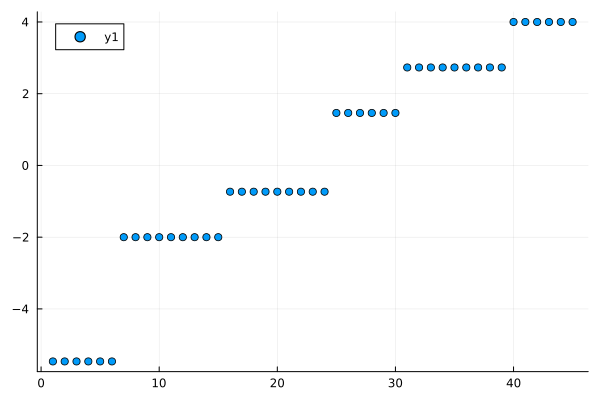

In [17]:
using Plots
scatter(real(EEA[1,1,:]))

In [18]:
bands = [[1,6], [7,15], [16,24], [25,30], [31,39], [40,45]]
bands2 = [[1,15], [16,30], [31,45]]
bands3 = [[1,24], [25,45]]

2-element Vector{Vector{Int64}}:
 [1, 24]
 [25, 45]

In [25]:
SS = 0
for band in bands
    UU = calc_link_vars(UUA[:,:,:,band[1]:band[2]])
    F12 = calc_F12(UU)
    println(sum(F12)/(2im*pi))
    SS += sum(F12)/(2im*pi)
end
println("=",SS)

4.0 + 3.107735992467378e-17im
-3.0000000000000004 - 2.1153656597255423e-16im
0.9999999999999999 + 1.0447411197331226e-16im
-1.9999999999999998 - 9.910761617288219e-17im
-3.0 - 2.289604217104436e-16im
3.9999999999999996 - 8.452662276013986e-17im
=0.9999999999999996 - 4.885797547180339e-16im


In [26]:
for band in bands2
    UU = calc_link_vars(UUA[:,:,:,band[1]:band[2]])
    F12 = calc_F12(UU)
    println(sum(F12)/(2im*pi))
end

1.0000000000000002 - 2.328645042662223e-16im
-2.0 + 7.116215009958553e-17im
0.9999999999999999 - 8.995351320784108e-17im


In [27]:
for band in bands3
    UU = calc_link_vars(UUA[:,:,:,band[1]:band[2]])
    F12 = calc_F12(UU)
    println(sum(F12)/(2im*pi))
end

-1.0000000000000002 + 1.971413400239652e-16im
0.9999999999999999 + 8.60153575558623e-17im


# Updated Chern

In [13]:
@nbinclude("../../Chern_parameter_space_sum.ipynb")
n1 = 1
n2 = 4
calc_chern_hofstadter_mb_updated(param_dict, n1, n2)

LoadError: adjoint not defined for Array{ComplexF64, 4}. Consider using `permutedims` for higher-dimensional arrays.

In [1]:
using NBInclude
@nbinclude("../Hofstadter Single Particle in Theta Space.ipynb")
using QuantumOptics
using LinearAlgebra

In [2]:
Nx=Ny=3
N=Nx*Ny
p=1
q=Ny
alpha=p/q
PN=2
N1 = 10
N2 = 10
dx=2*pi/N1
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy));

In [3]:
function Op_Sp(Nx, Ny, alpha, Tx, Ty)
    
    H_T = HSP_T(Nx, Ny, alpha, Tx, Ty, 0)
   
    N = Nx*Ny
    basis = NLevelBasis(N) 
    
    H = SparseOperator(basis)
    
    for m in 1:N
        for n in 1:N
            H = H + H_T[m,n] * transition(basis, m, n)
        end
    end
    
    return H
end

Op_Sp (generic function with 1 method)

In [8]:
HSP_T(Nx, Ny, alpha, 0, 0, 0)

9×9 Matrix{ComplexF64}:
  0.0+0.0im  -1.0+0.0im  -1.0-0.0im  …   0.0+0.0im        0.0+0.0im
 -1.0-0.0im   0.0+0.0im  -1.0+0.0im     -1.0-0.0im        0.0+0.0im
 -1.0+0.0im  -1.0-0.0im   0.0+0.0im      0.0+0.0im       -1.0-0.0im
 -1.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im        0.0+0.0im
  0.0+0.0im  -1.0+0.0im   0.0+0.0im     -1.0+0.0im        0.0+0.0im
  0.0+0.0im   0.0+0.0im  -1.0+0.0im  …   0.0+0.0im       -1.0+0.0im
 -1.0-0.0im   0.0+0.0im   0.0+0.0im      0.5-0.866025im   0.5+0.866025im
  0.0+0.0im  -1.0-0.0im   0.0+0.0im      0.0+0.0im        0.5-0.866025im
  0.0+0.0im   0.0+0.0im  -1.0-0.0im      0.5+0.866025im   0.0+0.0im

In [17]:
op = Op_Sp(Nx, Ny, alpha, Tx[1], Ty[1]);

In [24]:
basis = NLevelBasis(N)
states = bosonstates(basis, PN)
function get_mb_op(PN, op)
    basis = NLevelBasis(N)
    states = bosonstates(basis, PN)
    basis_mb = ManyBodyBasis(basis, states)
    
    H = SparseOperator(basis_mb) 
    for m in 1:N
        for n in 1:N
            H += op.data[m,n] * transition(basis_mb, m, n)
            #H += H_T[m,n] * transition(basis_mb, m, n)
        end
    end
    
    return H
end

get_mb_op (generic function with 2 methods)

In [19]:
En, Un = eigen(dense(get_mb_op(op, PN)).data)
En

45-element Vector{Float64}:
 -5.464101615137781
 -5.464101615137772
 -5.464101615137769
 -5.464101615137767
 -5.464101615137751
 -5.464101615137711
 -2.000000000000006
 -2.000000000000002
 -1.9999999999999993
 -1.999999999999999
 -1.9999999999999976
 -1.999999999999996
 -1.9999999999999936
  ⋮
  2.732050807568877
  2.7320508075688776
  2.7320508075688776
  2.732050807568878
  2.7320508075688794
  2.7320508075688807
  3.9999999999999987
  3.9999999999999996
  4.000000000000001
  4.000000000000002
  4.000000000000002
  4.0000000000000036

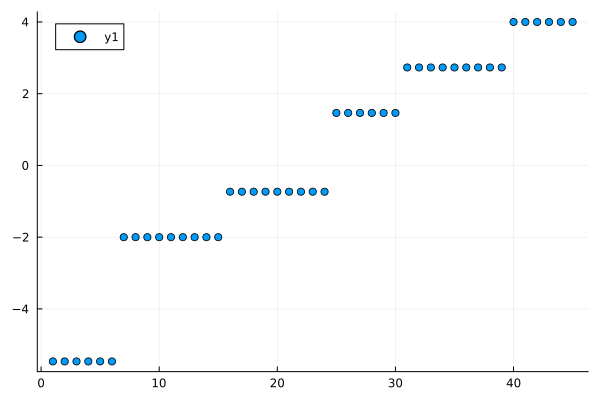

In [21]:
using Plots
scatter(En)

In [25]:
# executeme

function Chern_Nums(Tx, Ty, n1, n2)
    
    Sum=0
    
    for tx in range(start=1, stop=length(Tx))
        for ty in range(start=1, stop=length(Ty))
            
            op = Op_Sp(Nx, Ny, 1/q, Tx[tx], Ty[ty])
            H_mb = get_mb_op(PN, op)
            w1, v1 = eigen(dense(H_mb).data)
            i = sortperm(w1, by=real);w1 = w1[i];v1 = v1[:,i]

            # if isapprox(v1[1,1], 0+0im, atol=0.001) == false
            #     v1 = v1 ./ v1[1,1]
            #     v1 = v1 / norm(v1)
            # end
            
            v1 = v1[:,n1:n2]
            
            #------------------------------------
            op = Op_Sp(Nx, Ny, 1/q, Tx[tx]+dx, Ty[ty])
            H_mb = get_mb_op(PN, op)
            w2, v2 = eigen(dense(H_mb).data)
            i = sortperm(w2, by=real);w2 = w2[i];v2 = v2[:,i]

            # if isapprox(v2[1,1], 0+0im, atol=0.001) == false
            #     v2 = v2 ./ v2[1,1]
            #     v2 = v2 / norm(v2)
            # end
            
            v2 = v2[:,n1:n2]
            
            #------------------------------------
            op = Op_Sp(Nx, Ny, 1/q, Tx[tx], Ty[ty]+dy)
            H_mb = get_mb_op(PN, op)
            w3, v3 = eigen(dense(H_mb).data)
            i = sortperm(w3, by=real);w3 = w3[i];v3 = v3[:,i]


            # if isapprox(v3[1,1], 0+0im, atol=0.001) == false
            #     v3 = v3 ./ v3[1,1]
            #     v3 = v3 / norm(v3)
            # end
            
            v3 = v3[:,n1:n2]
            
            #------------------------------------
            op = Op_Sp(Nx, Ny, 1/q, Tx[tx]+dx, Ty[ty]+dy)
            H_mb = get_mb_op(PN, op)
            w4, v4 = eigen(dense(H_mb).data)
            i = sortperm(w4, by=real);w4 = w4[i];v4 = v4[:,i]

            # if isapprox(v4[1,1], 0+0im, atol=0.001) == false
            #     v4 = v4 ./ v4[1,1]
            #     v4 = v4 / norm(v4)
            # end
            
            v4 = v4[:,n1:n2]
            
            #----------LINK VARIABLES------------
            U1=det(adjoint(v1)*v2)
            U1=U1/abs(U1)
            U2=det(adjoint(v2)*v4)
            U2=U2/abs(U2)
            U3=det(adjoint(v3)*v4)
            U3=U3/abs(U3)
            U4=det(adjoint(v1)*v3)
            U4=U4/abs(U4)
            
            #----------BERRY CURVATURE-----------
            F=log(U1*U2*1/U3*1/U4)
            Sum=Sum+F
            
        end
    end
    
    return 1/(2*pi*1im)*Sum
end

Chern_Nums (generic function with 1 method)

In [26]:
for i in 1:Int(length(states)/Nx):length(states)
    C = Chern_Nums(Tx, Ty, i, i+(Int(length(states)/Nx))-1)
    println(C)
end

1.0000000000000009 - 2.978836559575988e-16im
-1.9999999999999984 + 2.6773809916226116e-16im
0.9999999999999996 - 5.951461098289711e-17im


In [27]:
Chern_Nums(Tx, Ty, 1, 6)

3.9999999999999982 + 6.041190288522051e-17im

In [28]:
Chern_Nums(Tx, Ty, 7, 15)

-2.999999999999999 + 3.9212518912173246e-16im

In [31]:
Chern_Nums(Tx, Ty, 16, 24)

6.0046910114196645 + 1.3136413777245537e-16im

In [32]:
Chern_Nums(Tx, Ty, 25, 30)

-6.9939547502816435 - 2.870039916419332e-17im

In [33]:
Chern_Nums(Tx, Ty, 31, 39)

-3.0 - 2.1175657504475845e-16im

In [34]:
Chern_Nums(Tx, Ty, 40, 45)

3.999999999999999 - 1.4359258779187598e-16im